<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/DecisionTree_CustomerSatisfaction_AirlineCompany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build a decision tree

The dataset includes survey responses from 129,880 customers.
It includes data points such as class, flight distance, and in-flight entertainment, among others. Let's build a decision tree model to predict whether or not a customer will be satisfied with their flight experience.

In [1]:
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Visualization package imports
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv("/content/sample_data/Invistico_Airline.csv")

In [3]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


##Data exploration, data cleaning, and model preparation

In [4]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [5]:
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

##Check the counts of the predicted labels

In [6]:
df_original['satisfaction'].value_counts(dropna=False)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

##Check for missing value

In [7]:
print(f"Number of missing values: {df_original.isna().any(axis=1).sum()}")

missing_value_rows = df_original[df_original.isna().any(axis=1)]
df_original.isnull().sum()

Number of missing values: 393


satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
df_original.shape

(129880, 22)

##Drop the rows with missing values

In [10]:
df_subset = df_original.dropna(axis=0)
df_subset.isna().any(axis=1).sum()
print(f"Number of missing values: {df_subset.isna().any(axis=1).sum()}")

Number of missing values: 0


In [11]:
df_subset.shape

(129487, 22)

##Encode the data

In [12]:
df_subset['Class'] = df_subset['Class'].replace({"Business": 3, "Eco Plus": 2, "Eco": 1})
df_subset.head()

<ipython-input-12-17496b8f4bb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Class'] = df_subset['Class'].replace({"Business": 3, "Eco Plus": 2, "Eco": 1})


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [13]:
df_subset['satisfaction'] = df_subset['satisfaction'].replace({"satisfied": 1, "dissatisfied": 0})
df_subset.head()

<ipython-input-13-667a2316cff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['satisfaction'] = df_subset['satisfaction'].replace({"satisfied": 1, "dissatisfied": 0})


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


##Convert categorical columns into numeric

In [14]:
df_subset = pd.get_dummies(df_subset, drop_first=True)
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,0,3,5,3,2,0,0.0,0,1
1,1,47,3,2464,0,0,0,3,0,2,...,4,4,4,2,3,2,310,305.0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,3,3,4,4,4,2,0,0.0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,0,1,4,1,3,0,0.0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,0,2,4,2,5,0,0.0,0,1


In [15]:
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        uint8
Type of Travel_Personal Travel         uint8
dtype: obj

##Create the training and testing data

In [16]:
# Define the y (target) variable
y = df_subset['satisfaction']

# Define the X (predictor) variables
X = df_subset.copy()
X = X.drop('satisfaction', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, stratify=y,
                                                    random_state=0)

##Model building
Fit a decision tree classifier model to the data

In [17]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [18]:
# Generate performance metrics
print("Accuracy:", "%.4f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.4f" % precision_score(y_test, dt_pred))
print("Recall:", "%.4f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.4f" % f1_score(y_test, dt_pred))

Accuracy: 0.9334
Precision: 0.9366
Recall: 0.9422
F1 Score: 0.9393


## confusion matrix

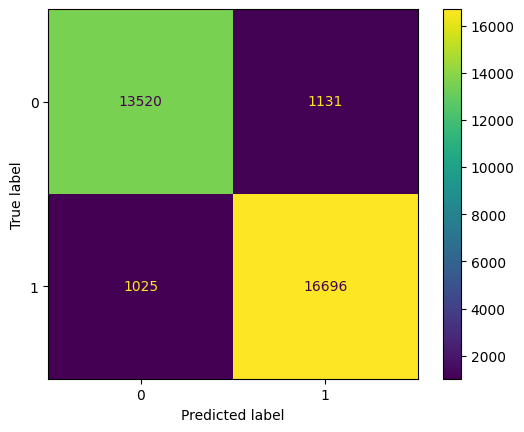

In [19]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

# Generate confusion matrix
conf_matrix_plot(decision_tree, X_test, y_test)

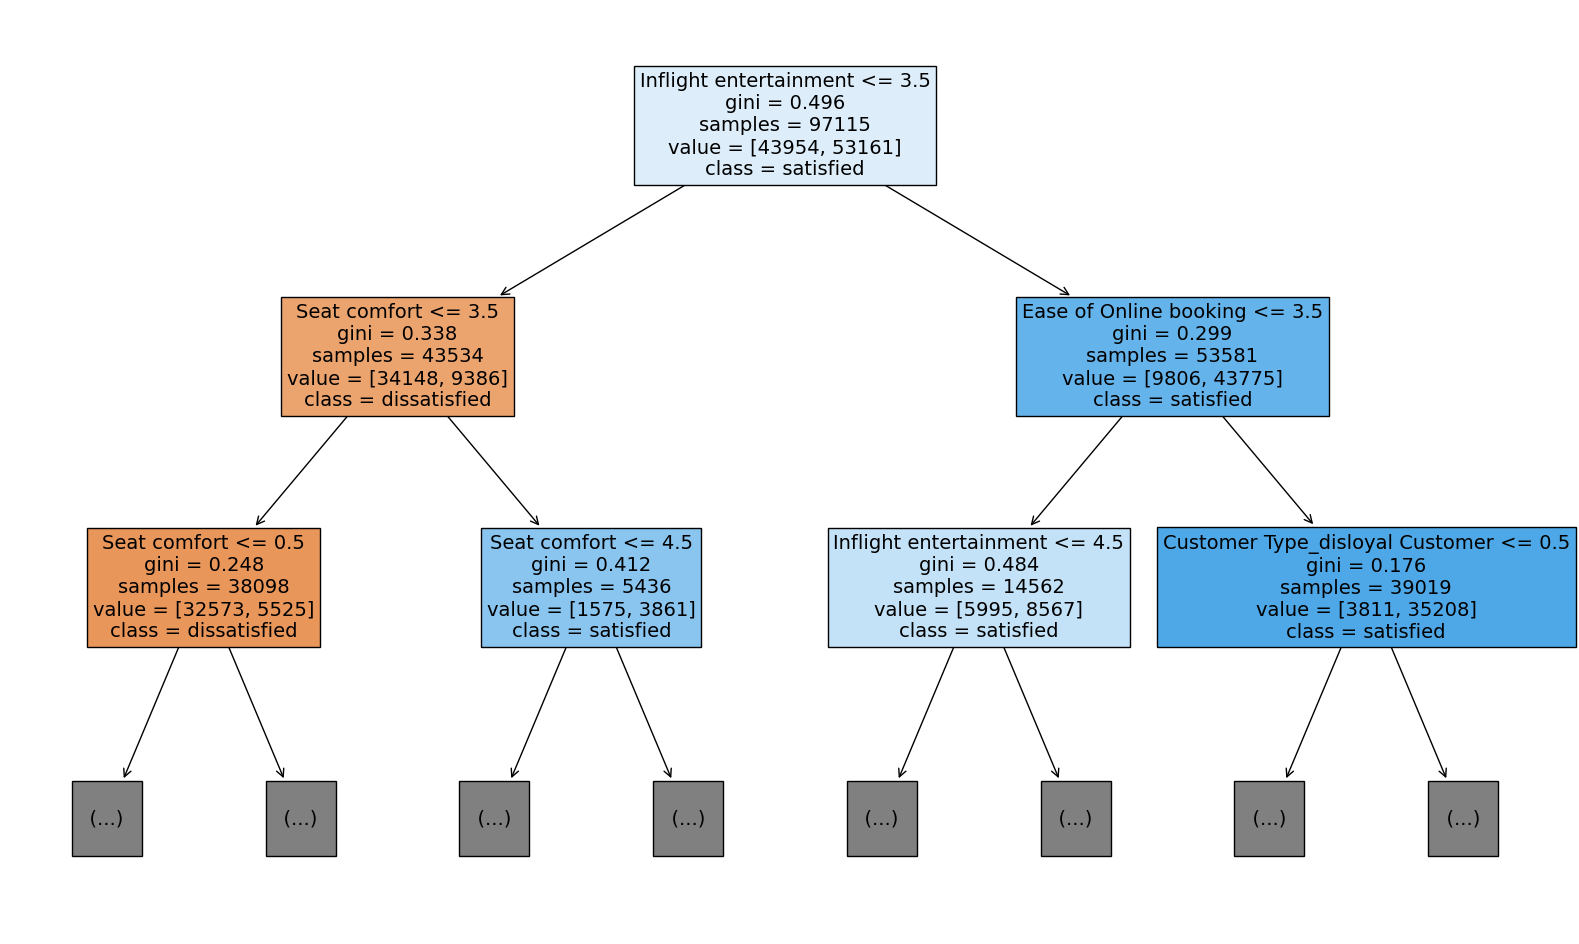

In [20]:
# Plot the tree
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns,
          class_names={0:'dissatisfied', 1:'satisfied'}, filled=True);
plt.show()

##Hyperparameter tuning

In [21]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

##Check combinations of values

In [22]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 0)

# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree,
                   tree_para,
                   scoring = scoring,
                   cv=5,
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [23]:
# Examine the best model from GridSearch
clf.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=2, random_state=0)

In [24]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9442


In [25]:
results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                         }
                        )

    return table

make_results("Tuned Decision Tree", clf)

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.944238,0.934426,0.95428,0.939587


## Plor tree after tuning

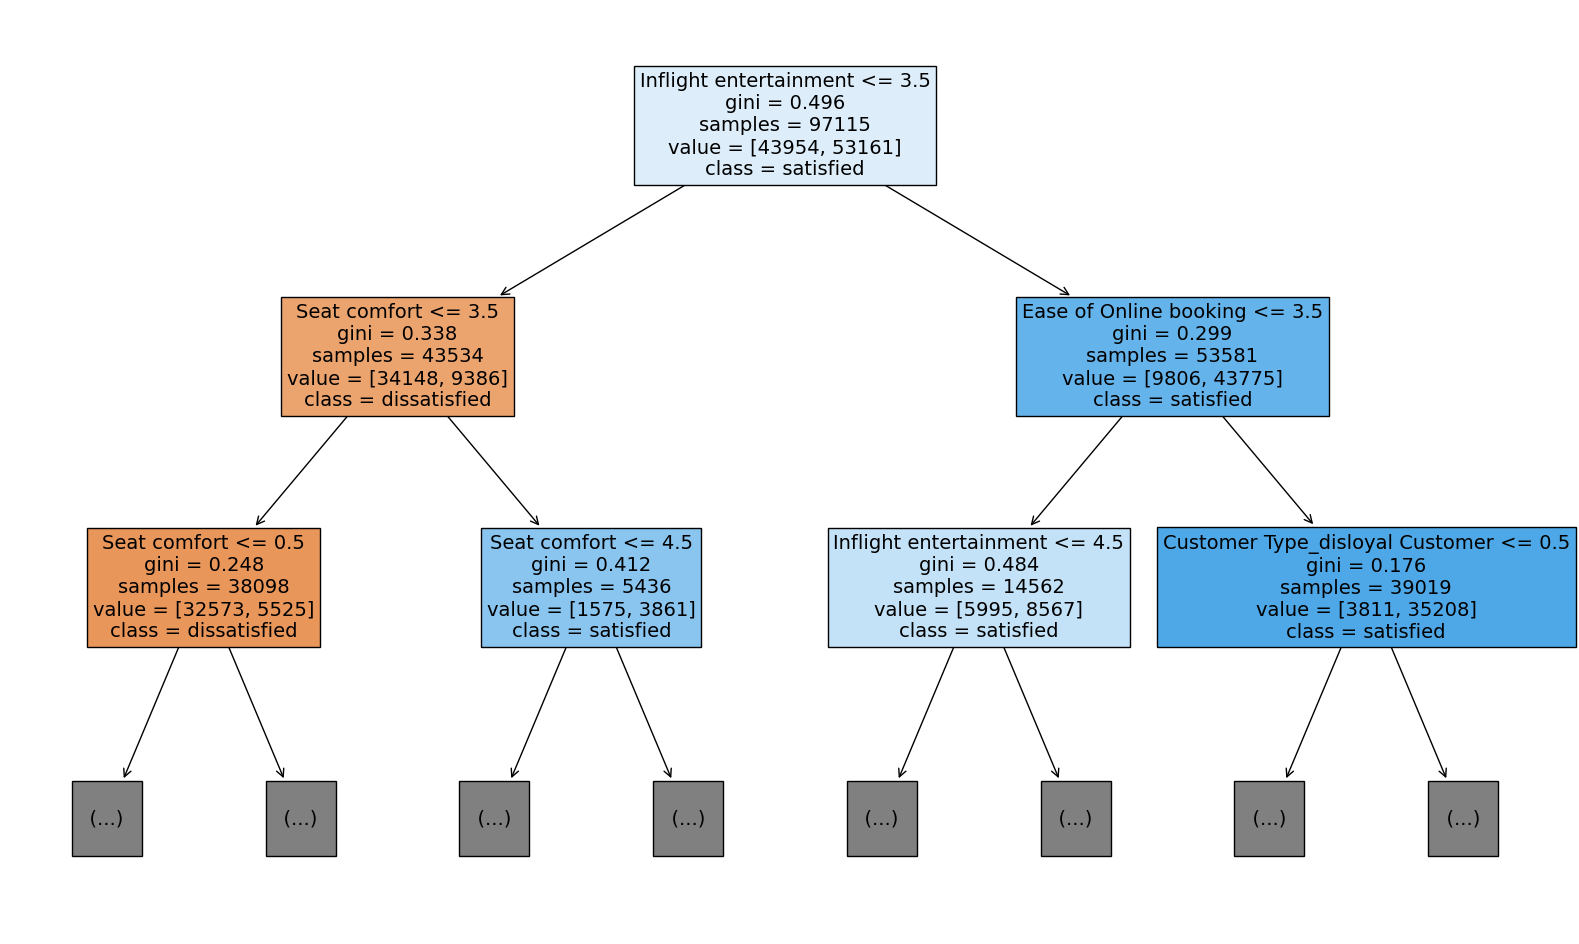

In [26]:
## Plot the tree
best_tree = clf.best_estimator_
plt.figure(figsize=(20,12))
plot_tree(best_tree,  max_depth=2, fontsize=14, feature_names=X.columns,
          class_names={0:'dissatisfied', 1:'satisfied'}, filled=True);
plt.show()

Model's features and which one the model uses first to sort the samples

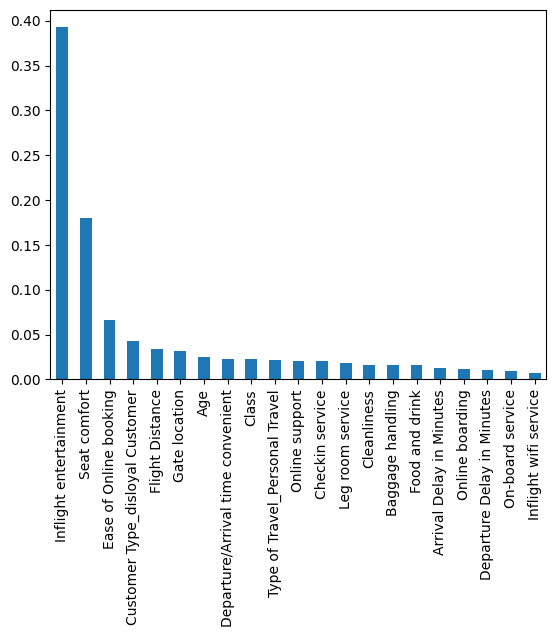

In [27]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);